### This notebook presents how to obtain number embeddings with NEKG.

<ul>
    <li> In <b>Section 3.1</b>, we construct the knowledge, generating 200 triples (e.g., ['0','isLessThan', '50'], ['100','isLessThan', '150'], etc.).</li><br>
    <li>In <b>Section 3.2</b>, we embed the graph in a 100-D vector space using a standard graph embedding method TransE. We visualize the embedding vectors using t-SNE in a 2-D space.</li><br>
    <li>In <b>Section 3.3</b>, we embed the integers from 500 to 1000 (i.e., [500, 1000)) using the interpolation method and visualize the embedding vectors using t-SNE in a 2-D space.</li>
</ul>




In [34]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import ampligraph
import ampligraph.latent_features as AL

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

<b>VERSION:</b>
<ul>
    <li>python 3.7.3</li>
    <li>tensorflow 1.15.0</li>
    <li>numpy 1.19.5</li>
    <li>ampligraph 1.3.2</li>
    <li>pandas 0.24.1</li>
    <li>sklearn 0.21.2</li>
    <li>matplotlib 3.4.2</li>
</ul>

### 3.1 Knowledge Graph Construction

In [35]:
# Knowledge Graph Construction.
def graph_construction(start, stop, step):
    kg = pd.DataFrame()
    kg['h'] = [i for i in np.arange(start, stop, step)]
    kg['r'] = ['isLessThan'] * int((stop-start) / step)
    kg['t'] = [i for i in np.arange(step, stop+1, step)]
    kg["h"] = kg.h.values.astype(str)
    kg["t"] = kg.t.values.astype(str)
    return kg

In [36]:
start = 0
stop = 10000
step = 50
kg_df = graph_construction(start, stop, step)
kg_df.head()

,h,r,t
0,0,isLessThan,50
1,50,isLessThan,100
2,100,isLessThan,150
3,150,isLessThan,200
4,200,isLessThan,250


### 3.2 Knowledge Graph Embedding

In [37]:
# Embedding Model.
kg_array = kg_df.to_numpy().astype(str)
model = AL.DistMult(epochs=200, k=300, verbose=True)# the k = 100 is the dimension of the embedding space.
model.fit(kg_array)

2022-11-07 21:46:34.935504: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-07 21:46:34.935589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce GTX 1660 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:01:00.0
2022-11-07 21:46:34.936015: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022-11-07 21:46:34.936216: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022

In [38]:
# Obtain the embedding vector of 100.
embedding = model.get_embeddings(entities='100', embedding_type='entity')
embedding

array([-9.40460712e-02, -2.26580799e-01, -2.94840068e-01, -2.92758167e-01,
       -1.84704829e-02,  5.19076139e-02,  5.82238920e-02, -9.89224911e-02,
        8.83393548e-03, -9.68966857e-02, -1.27788246e-01, -3.55537534e-02,
        7.62028322e-02, -1.26413420e-01, -3.61606218e-02,  3.66746902e-01,
        1.22725241e-01,  1.91411868e-01,  9.98951271e-02,  2.14986920e-01,
        3.64630401e-01, -1.54450789e-01, -1.48108333e-01, -2.44496584e-01,
       -2.41869405e-01,  1.21881515e-01,  2.08193570e-01, -2.57293284e-01,
        2.23254606e-01, -3.26369017e-01,  3.06797951e-01,  6.91790581e-02,
       -7.04983696e-02,  3.24611217e-01,  3.16719294e-01,  4.09758747e-01,
       -2.19971480e-04, -4.71493691e-01,  1.78907618e-01, -9.10007581e-02,
       -1.18703842e-01, -3.23835284e-01, -3.26125294e-01, -1.12607621e-01,
       -1.04663275e-01, -1.35417536e-01,  2.68283427e-01,  2.44115859e-01,
        2.44123917e-02,  3.26934010e-01,  7.71252885e-02,  4.79950011e-01,
       -1.88610807e-01,  

In [39]:
# Dimensionality reduction using t-SNE.
embeddings = model.get_embeddings(entities=[str(j) for j in np.arange(start, stop+1, step)], embedding_type='entity')
embeddings = np.asarray(embeddings, dtype='float64')
embeddings_tSNE = TSNE(n_components=2).fit_transform(embeddings)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(start, stop+1, step)]
embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,-12.346978,0.232752,0
1,1.104904,6.069164,50
2,-13.242124,-0.499327,100
3,1.747657,5.183480,150
4,-14.633340,-1.818701,200


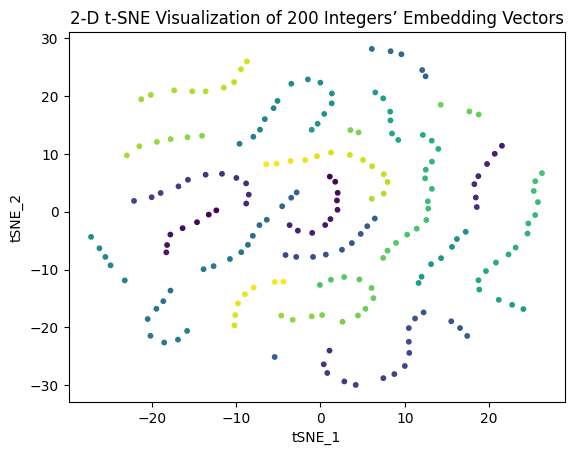

In [40]:
# Visualize the embedding vectors in 2-D space.
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2, c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

### 3.3 Interpolation Method

In [41]:
# Measure the similarity between numbers.
def cal_sim(x1, x2, x3):
    return (x2-x1)/(x3-x1)

In [42]:
# Obtain embedding vectors for OOVs.
OOVs = range(500, 1000)
OOV_embeddings = []
for i in OOVs:
    for j in np.arange(start, stop+1, step):
        if i < j:
            upper = j
            lower = j-step
            e1 = model.get_embeddings(str(lower), embedding_type='entity')
            e2 = model.get_embeddings(str(upper), embedding_type='entity')
            s2 = cal_sim(lower, i, upper)
            s1 = 1-s2            
            OOV_embeddings.append(e1 * s1 + e2 * s2)
            break

In [43]:
# Dimensionality reduction using t-SNE.
OOV_embeddings = np.asarray(OOV_embeddings, dtype='float64')
OOV_embeddings_tSNE = TSNE(n_components=2).fit_transform(OOV_embeddings)
OOV_embeddings_tSNE = pd.DataFrame(OOV_embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
OOV_embeddings_tSNE['magnitude'] = OOVs
OOV_embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,28.991411,-6.541795,500
1,29.017023,-6.421357,501
2,28.764341,-6.536204,502
3,28.969961,-6.211520,503
4,28.523731,-6.459489,504


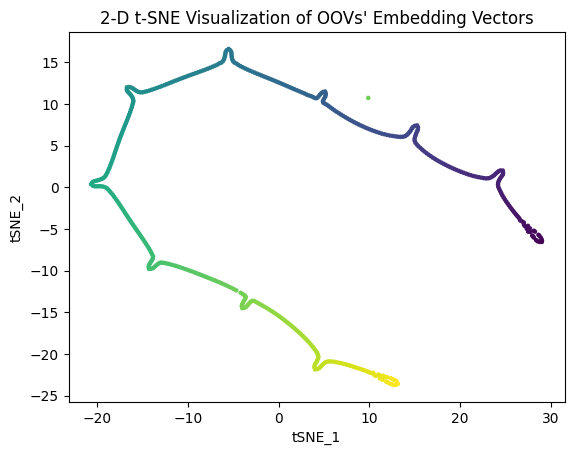

In [44]:
# Visualize the embedding vectors of OOVs in 2-D space.
plt.scatter(OOV_embeddings_tSNE.tSNE_1, OOV_embeddings_tSNE.tSNE_2, c=OOV_embeddings_tSNE.magnitude, s=5)
plt.title('2-D t-SNE Visualization of OOVs\' Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()